In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk import corpus
from nltk import tokenize
cv=CountVectorizer()
import os
import matplotlib.pyplot as plt
import string
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer, TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from nltk.stem.porter import PorterStemmer
import nltk
import re, string
from nltk.corpus import stopwords

# read from dataset¶

In [2]:
df=pd.read_csv('new_data.csv')
df.head()

,comments,label
0,yeah I got 2 backups for all that. I just hate...,0
1,I hate using my BB but love my iPhone. Haven'...,0
2,Get fucking real dude.,1
3,She is as dirty as they come and that crook ...,1
4,why did you fuck it up. I could do it all day...,1


In [3]:
shape=df.shape

In [4]:
print(shape)

(8817, 2)


In [5]:
DataType=df.dtypes

In [6]:
print(DataType)

comments    object
label        int64
dtype: object


In [7]:
X=df.comments

In [8]:
y=df.label

In [9]:
#output the  comments 
print(X)

0       yeah I got 2 backups for all that. I just hate...
1       I hate using my BB  but love my iPhone. Haven'...
2                                  Get fucking real dude.
3        She is as dirty as they come  and that crook ...
4        why did you fuck it up. I could do it all day...
                              ...                        
8812    no caffiene would kick my ass too - I'm addict...
8813    Now I'm hungry.  Damn you people and your midn...
8814    i've taken one also. people just piss me off m...
8815    That  too! Or even being able to park pulling ...
8816                          . . . HE'S FUCKING HIMSELF!
Name: comments, Length: 8817, dtype: object


In [10]:
print(y)

0       0
1       0
2       1
3       1
4       1
       ..
8812    0
8813    0
8814    0
8815    0
8816    1
Name: label, Length: 8817, dtype: int64


In [11]:
print(X.shape)

(8817,)


In [12]:
print(y.shape)

(8817,)


<AxesSubplot:>

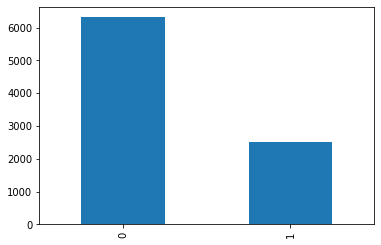

In [13]:
df['label'].value_counts().sort_index().plot.bar()

In [14]:
# tokenizing
tokenizer=RegexpTokenizer(r'\w+')
df=pd.read_csv('new_data.csv')
df.head()
df['tokenized-words'] = df['comments'].apply(lambda x: tokenizer.tokenize(x.lower()))
df[['comments','tokenized-words'] ].head(10)

,comments,tokenized-words
0,yeah I got 2 backups for all that. I just hate...,"[yeah, i, got, 2, backups, for, all, that, i, ..."
1,I hate using my BB but love my iPhone. Haven'...,"[i, hate, using, my, bb, but, love, my, iphone..."
2,Get fucking real dude.,"[get, fucking, real, dude]"
3,She is as dirty as they come and that crook ...,"[she, is, as, dirty, as, they, come, and, that..."
4,why did you fuck it up. I could do it all day...,"[why, did, you, fuck, it, up, i, could, do, it..."
5,Dude they dont finish enclosing the fucking s...,"[dude, they, dont, finish, enclosing, the, fuc..."
6,WTF are you talking about Men? No men thats n...,"[wtf, are, you, talking, about, men, no, men, ..."
7,Ill save you the trouble sister. Here comes a ...,"[ill, save, you, the, trouble, sister, here, c..."
8,Im dead serious.Real athletes never cheat don...,"[im, dead, serious, real, athletes, never, che..."
9,wow lol sounds like a lot of piss then hehehe,"[wow, lol, sounds, like, a, lot, of, piss, the..."


In [19]:
#Stopword 
stop_words = stopwords.words('english') + ['I', 'is', 'they', 'Im', 'she','as','that' 'could ','he','are','wow','lol']
# apply the same code as above but assign
# a new column to see the differences
df['stopwords-removed'] = df['comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df[['comments','stopwords-removed'] ].head(10)

,comments,stopwords-removed
0,yeah I got 2 backups for all that. I just hate...,yeah got 2 backups that. hate happen. struggli...
1,I hate using my BB but love my iPhone. Haven'...,hate using BB love iPhone. Haven't tried new B...
2,Get fucking real dude.,Get fucking real dude.
3,She is as dirty as they come and that crook ...,She dirty come crook Rengel Dems fucking corru...
4,why did you fuck it up. I could do it all day...,fuck up. could day too. Let's hour. Ping later...
5,Dude they dont finish enclosing the fucking s...,Dude dont finish enclosing fucking showers. ha...
6,WTF are you talking about Men? No men thats n...,WTF talking Men? No men thats menage that's gay.
7,Ill save you the trouble sister. Here comes a ...,Ill save trouble sister. Here comes big ol fuc...
8,Im dead serious.Real athletes never cheat don...,dead serious.Real athletes never cheat even ap...
9,wow lol sounds like a lot of piss then hehehe,sounds like lot piss hehehe


In [20]:
df = pd.read_csv('new_data.csv')
stop_words = stopwords.words("english")
wordnet = WordNetLemmatizer()
def text_preproc(x):
  x = x.lower()
  x = ' '.join([word for word in x.split(' ') if word not in stop_words])
  x = x.encode('ascii', 'ignore').decode()
  x = re.sub(r'https*\S+', ' ', x)
  x = re.sub(r'@\S+', ' ', x)
  x = re.sub(r'#\S+', ' ', x)
  x = re.sub(r'\'\w+', '', x)
  x = re.sub('[%s]' % re.escape(string.punctuation), ' ', x)
  x = re.sub(r'\w*\d+\w*', '', x)
  x = re.sub(r'\s{2,}', ' ', x)
  return x

In [23]:
df['clean_text'] = df.comments.apply(text_preproc)
df[['comments','clean_text'] ].head(100)

,comments,clean_text
0,yeah I got 2 backups for all that. I just hate...,yeah got backups that hate happen strugglin we...
1,I hate using my BB but love my iPhone. Haven'...,hate using bb love iphone tried new bb bb prov...
2,Get fucking real dude.,get fucking real dude
3,She is as dirty as they come and that crook ...,dirty come crook rengel dems fucking corrupt ...
4,why did you fuck it up. I could do it all day...,fuck up could day too let hour ping later sch...
...,...,...
95,http://twitpic.com/sbrn - we hate you phil. do...,hate phil doesnt tv want yet
96,cute video lexi u hve some of the of the werid...,cute video lexi u hve weridest cutest little t...
97,Fuck the pics! @giove_dea WE WANT VIDS!!,fuck pics want vids
98,Hard to play because it is damn fucking awful,hard play damn fucking awful


# Vectorization using TFIDF 

In [43]:
tfIdfVectorizer=TfidfVectorizer(use_idf=True, sublinear_tf=True)
tfIdf = tfIdfVectorizer.fit_transform(df.clean_text.tolist())

In [44]:
print(tfIdf)

  (0, 11043)	0.28806791448862323
  (0, 4827)	0.3699721080240784
  (0, 7476)	0.24518946792597507
  (0, 12015)	0.28171953216050166
  (0, 10538)	0.44648840131426876
  (0, 4840)	0.3476270798220085
  (0, 4874)	0.12245756768481002
  (0, 10979)	0.1807691034974776
  (0, 710)	0.4272116793660319
  (0, 4557)	0.21434903073024084
  (0, 12382)	0.21054362062477952
  (1, 6980)	0.30207916197488205
  (1, 8103)	0.2500939958079041
  (1, 4409)	0.13836879539830738
  (1, 2305)	0.316848925446943
  (1, 8563)	0.316848925446943
  (1, 7327)	0.18707999541491932
  (1, 11351)	0.24468754201870602
  (1, 5582)	0.22868285625722307
  (1, 6439)	0.16006595664455386
  (1, 842)	0.6221629064754077
  (1, 11691)	0.2399807826117633
  (1, 4874)	0.09382660158326173
  (2, 3210)	0.5412983375189692
  (2, 8789)	0.6260505717779341
  :	:
  (8813, 10033)	0.49883295056656113
  (8813, 8000)	0.2754519279104729
  (8813, 2595)	0.15903245131349972
  (8814, 10780)	0.5062926442177959
  (8814, 8823)	0.5206699465287528
  (8814, 290)	0.378712613057

In [46]:
print(tfIdf.shape) # means total rows  8817 with 12509 features

(8817, 12509)


In [47]:
df2 = pd.DataFrame(tfIdf[2].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"]) #for second entry only(just to check if working)
df2 = df2.sort_values('TF-IDF', ascending=False)
print (df2.head(5))

           TF-IDF
real     0.626051
dude     0.541298
get      0.396996
fucking  0.396801
aaaagh   0.000000


In [48]:
def display_scores(vectorizer, tfidf_result):
    scores = zip(vectorizer.get_feature_names(),
                 np.asarray(tfidf_result.sum(axis=0)).ravel())
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)
    i=0
    for item in sorted_scores:
        print ("{0:50} Score: {1}".format(item[0], item[1]))
        i = i+1
        if (i > 25):
          break

In [49]:
#top 25 words
display_scores(tfIdfVectorizer, tfIdf)

hate                                               Score: 307.85950350266415
damn                                               Score: 301.16670771141816
sucks                                              Score: 236.03727714271358
ass                                                Score: 191.96206158987408
fuck                                               Score: 182.69039674650975
lol                                                Score: 156.49389635173748
fucking                                            Score: 126.2871284503973
that                                               Score: 124.31778414459475
like                                               Score: 116.48122937344489
get                                                Score: 111.96804682604623
it                                                 Score: 100.27507152075806
bitch                                              Score: 95.36099949346517
know                                               Score: 90.64122191858773
yo

c:\python37\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
